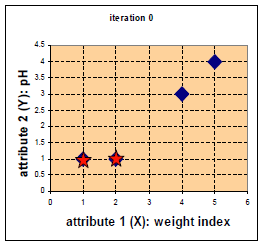

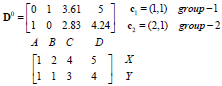

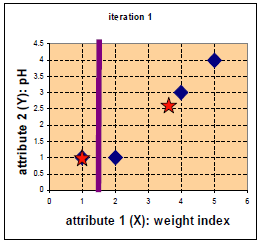

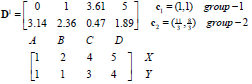

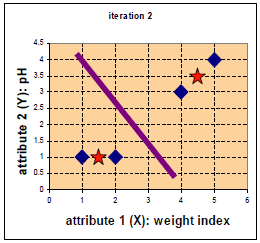

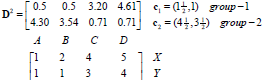

In [1]:
import numpy as np
import matplotlib.pyplot as plt  

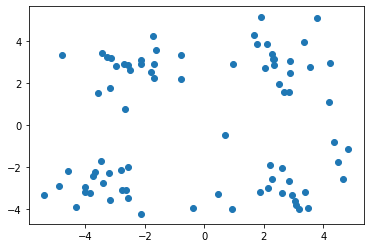

In [2]:
data = np.genfromtxt("kmeans.txt", delimiter=" ")

plt.scatter(data[:,0],data[:,1])
plt.show()

In [3]:
data.shape

(80, 2)

In [4]:

def euclDistance(vector1, vector2):  
    return np.sqrt(sum((vector2 - vector1)**2))
  
def initCentroids(data, k):  
    numSamples, dim = data.shape
    
    centroids = np.zeros((k, dim))  
    
    for i in range(k):         
        index = int(np.random.uniform(0, numSamples))          
        centroids[i, :] = data[index, :]  
    return centroids  
  
def kmeans(data, k):      
    numSamples = data.shape[0]   
    
    clusterData = np.array(np.zeros((numSamples, 2))) #1:分類 / 2:誤差 
   
    clusterChanged = True  
    # 初始化重心:隨機  
    centroids = initCentroids(data, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        
        for i in range(numSamples):              
            minDist  = 100000.0              
            minIndex = 0  
           
            for j in range(k):  
                
                distance = euclDistance(centroids[j, :], data[i, :])  
                
                if distance < minDist:  
                    minDist  = distance 
                    
                    clusterData[i, 1] = minDist                    
                    minIndex = j  
              
           
            if clusterData[i, 0] != minIndex:                 
                clusterChanged = True                
                clusterData[i, 0] = minIndex  
        
        for j in range(k):
            
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            pointsInCluster = data[cluster_index]              
            centroids[j, :] = np.mean(pointsInCluster, axis = 0) 
            showCluster(data, k, centroids, clusterData)
 
    return centroids, clusterData  

def showCluster(data, k, centroids, clusterData):  
    numSamples, dim = data.shape  
    if dim != 2:  
        print("dimension of your data is not 2!")  
        return 1    
    
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("Your k is too large!")  
        return 1    
    
    for i in range(numSamples):  
        markIndex = int(clusterData[i, 0])  
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])  
      
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
  
    plt.show()

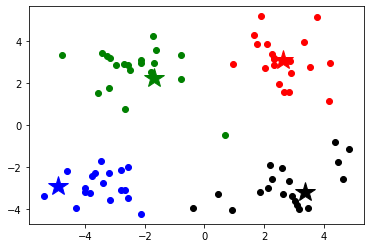

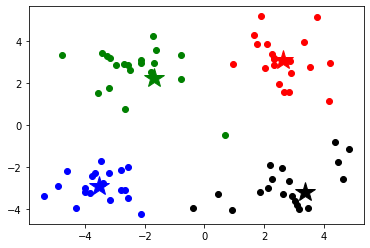

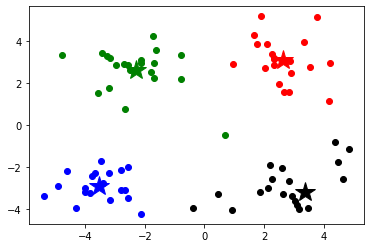

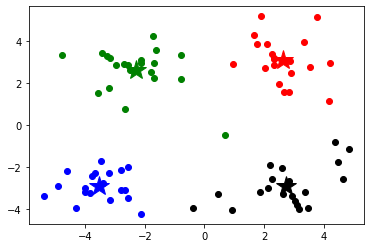

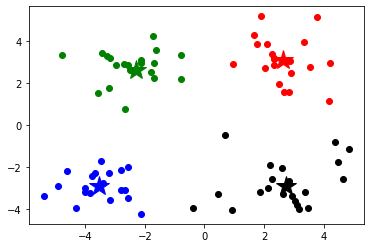

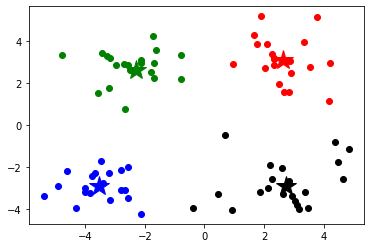

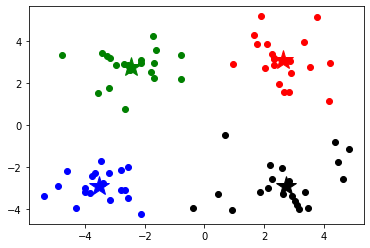

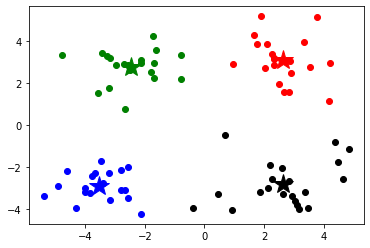

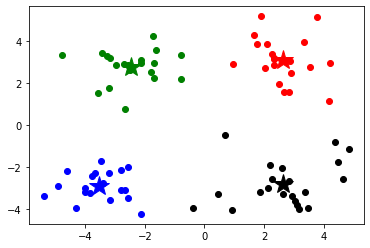

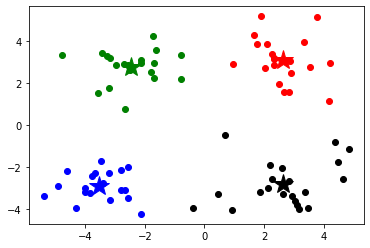

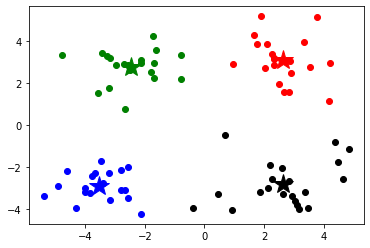

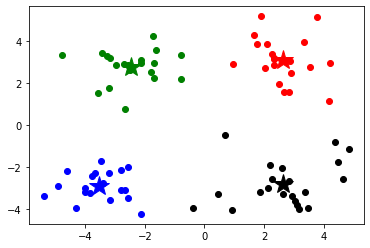

cluster complete!


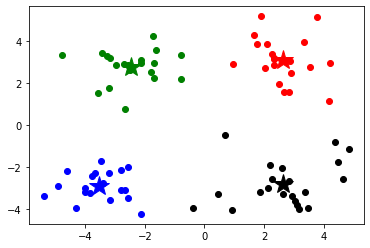

In [5]:

k = 4  
centroids, clusterData = kmeans(data, k)  
if np.isnan(centroids).any():
    print('Error')
else:
    print('cluster complete!')   
    
showCluster(data, k, centroids, clusterData)  

In [22]:
centroids

array([[-3.38237045, -2.9473363 ],
       [ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555],
       [ 2.80293085, -2.7315146 ]])

In [6]:
# 以新data去測試
x_test = [0,1]
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [7]:

np.tile(x_test,(k,1))-centroids

array([[-2.6265299 , -2.10868015],
       [ 3.53973889,  3.89384326],
       [ 2.46154315, -1.78737555],
       [-2.65077367,  3.79019029]])

In [8]:

(np.tile(x_test,(k,1))-centroids)**2

array([[ 6.89865932,  4.44653198],
       [12.52975144, 15.16201536],
       [ 6.05919468,  3.19471136],
       [ 7.02660103, 14.3655424 ]])

In [11]:
# 距離誤差
((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1)

array([11.34519129, 27.6917668 ,  9.25390604, 21.39214343])

In [12]:
# 列出 index
np.argmin(((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1))

2

In [14]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1))-centroids)**2).sum(axis=1)) for data in datas])

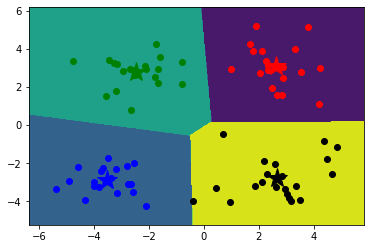

In [15]:
# 繪圖
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

showCluster(data, k, centroids, clusterData)  